Sample rate: 5000 Hz
Data shape: (17986,)
Data type: int16


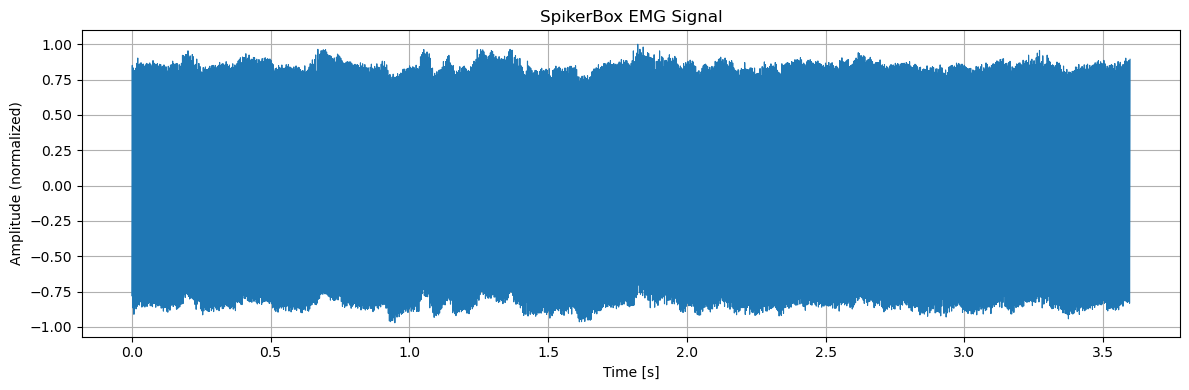

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Load the .wav file
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/BYB/Tes Output Spiker Box.wav')

# Print basic info
print("Sample rate:", sample_rate, "Hz")
print("Data shape:", data.shape)
print("Data type:", data.dtype)

# Normalize (if it's integer data)
if np.issubdtype(data.dtype, np.integer):
    data = data / np.max(np.abs(data))

# Create time axis
time = np.arange(len(data)) / sample_rate

# Plot the signal
plt.figure(figsize=(12, 4))
plt.plot(time, data, linewidth=0.8)
plt.title("SpikerBox EMG Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude (normalized)")
plt.grid(True)
plt.tight_layout()
plt.show()


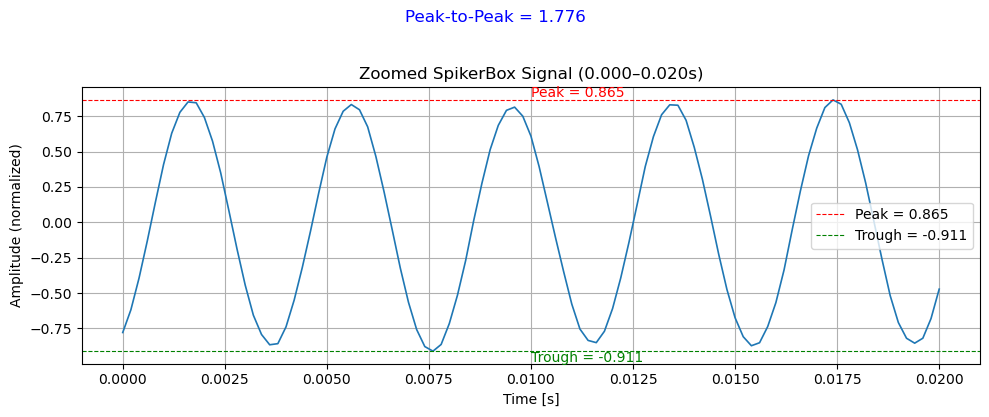

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Load WAV
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/BYB/Tes Output Spiker Box.wav')

# Normalize if needed
if np.issubdtype(data.dtype, np.integer):
    data = data / np.max(np.abs(data))

# Time axis
time = np.arange(len(data)) / sample_rate

# --- Zoom window (adjust as needed) ---
t_start = 0.0      # start time in seconds
t_end   = 0.02     # end time in seconds (about 5 cycles for 250 Hz)
mask = (time >= t_start) & (time <= t_end)

t_zoom = time[mask]
y_zoom = data[mask]

# --- Compute Peaks ---
peak = np.max(y_zoom)
trough = np.min(y_zoom)
vpp = peak - trough

# --- Plot zoomed signal ---
plt.figure(figsize=(10, 4))
plt.plot(t_zoom, y_zoom, linewidth=1.2)
plt.title(f"Zoomed SpikerBox Signal ({t_start:.3f}–{t_end:.3f}s)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude (normalized)")
plt.grid(True)

# Mark peaks and annotate
plt.axhline(peak, color='r', linestyle='--', linewidth=0.8, label=f'Peak = {peak:.3f}')
plt.axhline(trough, color='g', linestyle='--', linewidth=0.8, label=f'Trough = {trough:.3f}')
plt.text(t_zoom[len(t_zoom)//2], peak, f"Peak = {peak:.3f}", color='r', va='bottom')
plt.text(t_zoom[len(t_zoom)//2], trough, f"Trough = {trough:.3f}", color='g', va='top')

# Show Vpp in title
plt.suptitle(f"Peak-to-Peak = {vpp:.3f}", y=1.03, fontsize=12, color='blue')

plt.legend()
plt.tight_layout()
plt.show()


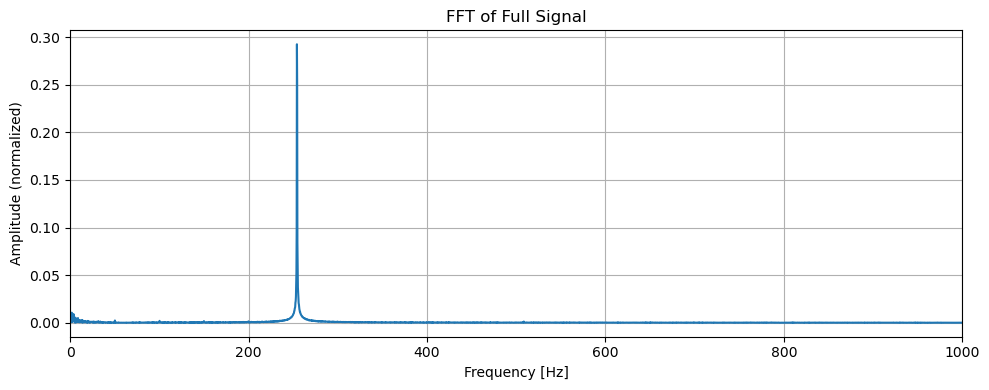

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load and normalize
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/BYB/Tes Output Spiker Box.wav')
if np.issubdtype(data.dtype, np.integer):
    data = data / np.max(np.abs(data))

# Perform FFT
N = len(data)
freqs = np.fft.rfftfreq(N, 1/sample_rate)
fft_vals = np.fft.rfft(data)
magnitude = np.abs(fft_vals) / N  # normalized amplitude

# Plot FFT
plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitude)
plt.title("FFT of Full Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude (normalized)")
plt.grid(True)
plt.xlim(0, 1000)  # focus on 0–1000 Hz
plt.tight_layout()
plt.show()


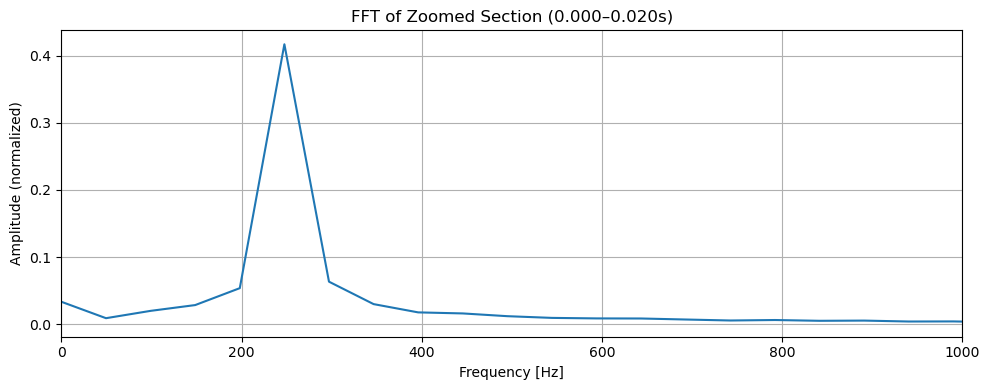

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load and normalize
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/BYB/Tes Output Spiker Box.wav')
if np.issubdtype(data.dtype, np.integer):
    data = data / np.max(np.abs(data))

# Define zoom window (same as your time-domain zoom)
t_start, t_end = 0.0, 0.02
time = np.arange(len(data)) / sample_rate
mask = (time >= t_start) & (time <= t_end)
segment = data[mask]

# FFT of the zoomed section
N = len(segment)
freqs = np.fft.rfftfreq(N, 1/sample_rate)
fft_vals = np.fft.rfft(segment)
magnitude = np.abs(fft_vals) / N

# Plot FFT
plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitude)
plt.title(f"FFT of Zoomed Section ({t_start:.3f}–{t_end:.3f}s)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude (normalized)")
plt.grid(True)
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()
